<h2>Classification with the MNIST data set</h2>

<h4>Hello, this is just an example of using tensorflow, and Keras to classify images in the MNIST dataset.</h4>

<h4>To get a good idea of the MNIST data set, you can go to this link.</h4>
<h5>https://www.kaggle.com/c/digit-recognizer/data</h5>

<h4>First we need to import all the libraries</h4>


In [33]:
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.0.0-alpha0


<h4>Load in the data set.</h4> 

In [2]:
mnist = tf.keras.datasets.mnist

<h4>We split up the data set between the variables and the label. The label being the digit recognizer (which digit is it). While the variable is the numpy array of digits, each representing a pixel density.</h4>

<h4>We seperate the dataset so the model will not learn from the model that will be bult later.</h4>

In [3]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


<h4>This is an example of the first value in x_train. It's a 28 by 28 image.</h4>

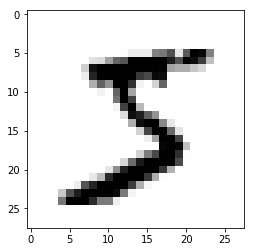

In [5]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

<h4>This is an example of a label of the above picture. Because this is supervised learning, we have all the labels and the machine must learn based on those labels and variables.</h4>

In [6]:
print(y_train[0])

5


<h4>Here is where we must reshape the data too flatten it. So rather of a 28 X 28 picture, it will be a vector of shape 784 rows and 1 column. This is so the nueral network can take in the information in the input layer.</h4>

In [64]:
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

<h4>The deep learning neural network is being built here. We build 2 layers with 128 nodes that uses the Relu activation function. The output layer will have 10 options, 1 option for each possible digit. This layer will use the softmax function so it will be normalized, but we also want it more continues than the Relu function. Then we determine which optimizer we're using, how we're calculating loss, and what kind of metrics we're looking for. Then we run it 5 times.</h4>

In [65]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation =tf.nn.softmax))

In [66]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [67]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3358 - accuracy: 0.9055
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1435 - accuracy: 0.9566
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0960 - accuracy: 0.9703
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0721 - accuracy: 0.9774
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0552 - accuracy: 0.9829


<h4>After training the model, we have to test it with the seperate test data we made earlier. The accuracy went down as expected but not by much, so overfitting wasn't a big problem.</h4>

In [68]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.3262 - accuracy: 0.9634
0.32621537694884756
0.9634


<h4>Here you can save this model and use it later. How you do it is listed below. Save it, load it, use the model to predict values.</h4>

In [69]:
model.save('test_mnist.model')

In [70]:
new_model = tf.keras.models.load_model('test_mnist.model')

In [71]:
predictions = new_model.predict(x_test)

In [38]:
print(predictions)

[[5.7780330e-08 1.5975768e-07 9.5936004e-05 ... 9.9933356e-01
  1.0813751e-06 1.2669750e-06]
 [4.5426368e-10 4.8546775e-04 9.9950528e-01 ... 3.1897862e-10
  1.5972471e-08 3.4920816e-13]
 [8.2468176e-08 9.9992812e-01 9.1004677e-06 ... 3.4916477e-05
  1.7491313e-05 4.9036788e-07]
 ...
 [1.0523750e-07 3.7113421e-06 3.9957786e-06 ... 7.5433651e-05
  6.9714802e-06 6.5602706e-04]
 [1.5168663e-06 2.7855519e-06 3.5204046e-08 ... 2.4357334e-06
  8.2250789e-04 9.3762573e-08]
 [2.5232662e-06 1.2092744e-08 1.2061905e-07 ... 1.2143957e-09
  1.8604679e-07 4.1400408e-10]]


<h4>Seeing how well the model does on new data after being imported.It predicted a 7, and the related picture is a 7.</h4>

In [72]:
print(np.argmax(predictions[0]))

7


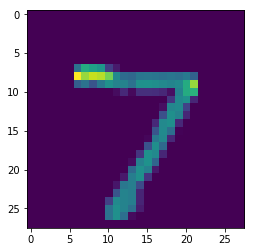

In [73]:
plt.imshow(x_test[0].reshape(28,28))